In [ ]:
''' A local school district has a goal to reach a 95% graduation rate by the end of the decade by
identifying students who need intervention before they drop out of school. As a software
engineer contacted by the school district, your task is to model the factors that predict how
likely a student is to pass their high school final exam, by constructing an intervention
system that leverages supervised learning techniques. The board of supervisors has asked
that you find the most effective model that uses the least amount of computation costs to
save on the budget. You will need to analyse the dataset on students' performance and
develop a model that will predict a given student will pass, quantifying whether an
intervention is necessary.'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Nisha\Downloads\student-data.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
df.shape

(395, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [7]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [12]:
df['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [26]:
# check imbalance
df['passed'].value_counts(normalize=True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

In [13]:
x = df.drop(['age','famsize','reason','guardian','activities','nursery','passed'],axis=1)
y = df['passed']

In [14]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)
label = {}
le = ['school','sex','address','Pstatus','schoolsup','famsup','paid','higher','internet','romantic']
for i in le:
    label[i] = LabelEncoder()
    x[i] = label[i].fit_transform(x[i])

In [15]:
x.head()

,school,sex,address,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,1,0,4,4,at_home,teacher,2,2,...,1,0,0,4,3,4,1,1,3,6
1,0,0,1,1,1,1,at_home,other,1,2,...,1,1,0,5,3,3,1,1,3,4
2,0,0,1,1,1,1,at_home,other,1,2,...,1,1,0,4,3,2,2,3,3,10
3,0,0,1,1,4,2,health,services,1,3,...,1,1,1,3,2,2,1,1,5,2
4,0,0,1,1,3,3,other,other,1,2,...,1,0,0,4,3,2,1,2,5,4


In [16]:
df.Mjob.nunique()

5

In [17]:
df.Fjob.nunique()

5

In [18]:
# One hot encoding
x = pd.get_dummies(x)

In [19]:
x.head()

,school,sex,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,0,0,1,0,4,4,2,2,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,1,1,1,1,2,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,1,1,1,1,2,3,1,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1,1,4,2,1,3,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,1,3,3,1,2,0,0,...,0,0,1,0,0,0,0,1,0,0


In [20]:
# split to test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [21]:
x_train.shape

(316, 32)

In [32]:
# Random forest classifier
import time
start = time.time()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
end = time.time()
print('computational time is :',end-start)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
print('f1 score is :',f1_score(y_test,y_pred))
print('accuracy score is :',accuracy_score(y_test,y_pred))

computational time is : 0.12953495979309082
f1 score is : 0.8032786885245902
accuracy score is : 0.6962025316455697


In [33]:
confusion_matrix(y_test,y_pred)

array([[ 6, 21],
       [ 3, 49]], dtype=int64)

In [35]:
# Logistic Regression
start = time.time()
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
end = time.time()
print('computational time is :',end-start)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
print('f1 score is :',f1_score(y_test,y_pred))
print('accuracy score is :',accuracy_score(y_test,y_pred))

computational time is : 0.027677059173583984
f1 score is : 0.8070175438596492
accuracy score is : 0.7215189873417721


C:\Users\Nisha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
confusion_matrix(y_test,y_pred)

array([[11, 16],
       [ 6, 46]], dtype=int64)

In [52]:
# K-NN
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
acc_values = [] 
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    end = time.time()  
print(acc_values)  

[0.6455696202531646, 0.6329113924050633, 0.620253164556962, 0.6962025316455697, 0.6708860759493671, 0.6962025316455697, 0.7215189873417721, 0.7088607594936709, 0.6835443037974683, 0.6708860759493671, 0.6962025316455697, 0.6962025316455697]


Text(0, 0.5, 'Accuracy')

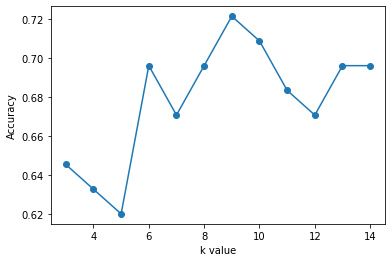

In [53]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [54]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('computational time is :',end-start)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
print('f1 score is :',f1_score(y_test,y_pred))
print('accuracy score is :',accuracy_score(y_test,y_pred))

computational time is : 0.0673668384552002
f1 score is : 0.7457627118644068
accuracy score is : 0.620253164556962


In [44]:
confusion_matrix(y_test,y_pred)

array([[ 5, 22],
       [ 8, 44]], dtype=int64)

In [47]:
# Decision Tree
start = time.time()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predict=dt.predict(x_test)
end = time.time()
print('computational time is :',end-start)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
print('f1 score is :',f1_score(y_test,y_pred))
print('accuracy score is :',accuracy_score(y_test,y_pred))

computational time is : 0.016119956970214844
f1 score is : 0.7457627118644068
accuracy score is : 0.620253164556962


In [45]:
confusion_matrix(y_test,y_pred)

array([[ 5, 22],
       [ 8, 44]], dtype=int64)

In [48]:
# Gradient Boosting
start = time.time()
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_predict=GB.predict(x_test)
end = time.time()
print('computational time is :',end-start)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
print('f1 score is :',f1_score(y_test,y_pred))
print('accuracy score is :',accuracy_score(y_test,y_pred))

computational time is : 0.08010125160217285
f1 score is : 0.7457627118644068
accuracy score is : 0.620253164556962


In [46]:
confusion_matrix(y_test,y_pred)

array([[ 5, 22],
       [ 8, 44]], dtype=int64)

In [ ]:
# Logistic regression model have high f1 score and accuracy score and also contain less wrong values in confusion matrix.
# Computational time is also comparatively less.So we can consider Logistic regression model as an effective model.